
# Computational Astrophysics 2021
---
## Eduard Larrañaga

Observatorio Astronómico Nacional\
Facultad de Ciencias\
Universidad Nacional de Colombia

---

# Linear Fit with SciKit-Learn Example 1

### About this notebook

In this worksheet, we will use the `scikit-learn` package to make a linear fit of Hubble's experimental data.

---

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import pandas as pd

from sklearn.linear_model import LinearRegression

In [ ]:
path='' #Define an empty string to use in case of local working

In [ ]:
# Working with google colab needs to mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# we define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/CA2021/10. Regression II/presentation/SciKit_Regression01/'

### Edwin Hubble's data

Once again, we will use 1920's experimental data by Hubble and Humason, 

https://ui.adsabs.harvard.edu/abs/1931ApJ....74...43H

We use again the dataset summarized in the file `hubble.csv`.



In [ ]:
df = pd.read_csv(path+"hubble.csv")

df

,Name,N_measurements,velocity,mean_m
0,Virgo,7,890,12.5
1,Pegasus,5,3810,15.5
2,Pisces,4,4630,15.4
3,Cancer,2,4820,16.0
4,Perseus,4,5230,16.4
5,Coma,3,7500,17.0
6,Ursa_Major,1,11800,18.0
7,Leo,1,19600,19.0
8,[No_Name],16,2350,13.8
9,[No_Name],16,630,11.6


In [ ]:
df.describe()

,N_measurements,velocity,mean_m
count,10.000000,10.000000,10.000000
mean,5.900000,6126.000000,15.520000
std,5.626327,5750.565576,2.331332
min,1.000000,630.000000,11.600000
25%,2.250000,2715.000000,14.200000
50%,4.000000,4725.000000,15.750000
75%,6.500000,6932.500000,16.850000
max,16.000000,19600.000000,19.000000


The data in the data frame includes 10 samples (Nebulae) with 4 features:

**Name** : Name of the nebula \
**N_measurement** : Number of velocities measured by Hubble and Humason \
**velocity** : Mean velocity of the nebula measured in km/s \
**mean_m** : Apparent magnitude of the nebula

___

Remember that the apaprent magnitude is related to the distance in parsecs through the relation

$\log_{10} d = \frac{m-M+5}{5}$

where $M=-13.8$ is the absolute magnitude reported by Hubble and considered as a constant in the paper.

We already know that the linear fit will be made between the apparent magnitude and the logarithm of the velocity and therefore we introduce a new column in the dataframe.


In [ ]:
df['log10_velocity'] = np.log10(df['velocity'])
df

,Name,N_measurements,velocity,mean_m,log10_velocity
0,Virgo,7,890,12.5,2.949390
1,Pegasus,5,3810,15.5,3.580925
2,Pisces,4,4630,15.4,3.665581
3,Cancer,2,4820,16.0,3.683047
4,Perseus,4,5230,16.4,3.718502
5,Coma,3,7500,17.0,3.875061
6,Ursa_Major,1,11800,18.0,4.071882
7,Leo,1,19600,19.0,4.292256
8,[No_Name],16,2350,13.8,3.371068
9,[No_Name],16,630,11.6,2.799341


In [ ]:
df.describe()

,N_measurements,velocity,mean_m,log10_velocity
count,10.000000,10.000000,10.000000,10.000000
mean,5.900000,6126.000000,15.520000,3.600705
std,5.626327,5750.565576,2.331332,0.461869
min,1.000000,630.000000,11.600000,2.799341
25%,2.250000,2715.000000,14.200000,3.423532
50%,4.000000,4725.000000,15.750000,3.674314
75%,6.500000,6932.500000,16.850000,3.835921
max,16.000000,19600.000000,19.000000,4.292256


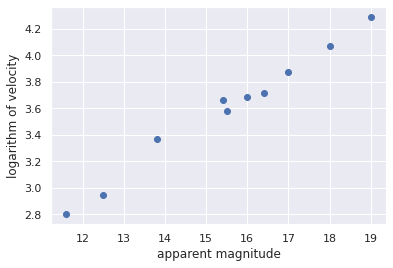

In [ ]:
plt.scatter(df['mean_m'], df['log10_velocity'])
plt.xlabel(r'apparent magnitude')
plt.ylabel(r'logarithm of velocity')
plt.show()

### Linear Fit using  `scikit-learn`

From the `scikit-learn.linear_model` package, we will import the function `LinearRegression`. COmplete documentation about it can be found at

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

This function fits a linear model to minimize the residual sum of squares between the observed targets in the dataset and the targets predicted by the linear approximation (ordinary least squares fit).

Before making the fit, we need to prepare our data. The `LinearRegression().fit()` metod receives as arguments **two arrays**. Hence, we will transform the dataframe features into arrays that will train the model. 

In [ ]:
X_train = np.asanyarray(df['mean_m'])
y_train = np.asanyarray(df['log10_velocity'])

X_train , y_train

(array([12.5, 15.5, 15.4, 16. , 16.4, 17. , 18. , 19. , 13.8, 11.6]),
 array([2.94939001, 3.58092498, 3.66558099, 3.68304704, 3.71850169,
        3.87506126, 4.07188201, 4.29225607, 3.37106786, 2.79934055]))

Note that we use the capital letter `X` to denote the independent variable and the letter `y` to denote the dependent variable. This convention is used because, in general, we may have multiple independent variables.

Since we are going to make a 1-dimensional linear fit with the form 

$y = a_1 + a_2 x$ ,

the method `LinearRegression().fit()` requires a column array `X_train` and a row array `y_train`. Thus, we reshape the X data array:

In [ ]:
X_train = X_train.reshape(-1,1)
X_train , y_train

(array([[12.5],
        [15.5],
        [15.4],
        [16. ],
        [16.4],
        [17. ],
        [18. ],
        [19. ],
        [13.8],
        [11.6]]),
 array([2.94939001, 3.58092498, 3.66558099, 3.68304704, 3.71850169,
        3.87506126, 4.07188201, 4.29225607, 3.37106786, 2.79934055]))

Now, we train the linear model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

The parameters obtained from the lienar fit are recovered with the methods `.intercept_` ($a_1$) and `.coef_` ($a_2$).

In [ ]:
lr.intercept_ , lr.coef_ 

(0.5484040402255594, array([0.19666889]))

Note that the `.coef_` method returns an array becuase the `LinearRegression` fit can be applied to multidimensional systems. 

The resulting coefficients are almost equal to those obtained by our hand-made linear fit,

a_1 = 0.5484040402255217 \
a_2 = 0.19666889208743046

The `LinearRegression` function also includes the method `.score()` which returns the coefficient of determination $R^2$ for the model. This is defined as

$R^2 = 1 - \frac{\Sigma (a_1 + a_2 x_i - y_i)^2}{\Sigma (y_i - \bar{y})^2} = 1 - \frac{\Sigma (y(x_i) - y_i)^2}{\Sigma (y_i - \bar{y})^2}$

where $\bar{y} = \frac{1}{N} \Sigma y_i$ is the mean value of the y-data.The best possible score is $R^2 = 1.0$ and it can take negative values, because the model can be arbitrarily worse. A constant model that always predicts the expected value of each y, disregarding the input features, would get a score of $R^2 = 0.0$.

In this case, we obtain a really good fit:

In [ ]:
lr.score(X_train, y_train)

0.9854665665565867